In [ ]:
"""
@author: Abdelli Zaineb
"""


In [98]:
import numpy as np
import pandas as pd 
from pathlib import Path

from subprocess import check_output

import scipy.io.wavfile as wav
import scipy.signal as signal
import matplotlib.pyplot as plt
import os

In [99]:
import wave
def _wav2array(nchannels, sampwidth, data):
    """data must be the string containing the bytes from the wav file."""
    num_samples, remainder = divmod(len(data), sampwidth * nchannels)
    if remainder > 0:
        raise ValueError('The length of data is not a multiple of '
                         'sampwidth * num_channels.')
    if sampwidth > 4:
        raise ValueError("sampwidth must not be greater than 4.")

    if sampwidth == 3:
        a = np.empty((num_samples, nchannels, 4), dtype=np.uint8)
        raw_bytes = np.fromstring(data, dtype=np.uint8)
        a[:, :, :sampwidth] = raw_bytes.reshape(-1, nchannels, sampwidth)
        a[:, :, sampwidth:] = (a[:, :, sampwidth - 1:sampwidth] >> 7) * 255
        result = a.view('<i4').reshape(a.shape[:-1])
    else:
        # 8 bit samples are stored as unsigned ints; others as signed ints.
        dt_char = 'u' if sampwidth == 1 else 'i'
        a = np.fromstring(data, dtype='<%s%d' % (dt_char, sampwidth))
        result = a.reshape(-1, nchannels)
    return result
def readwav(file):
    """
    Read a wav file.
    Returns the frame rate, sample width (in bytes) and a numpy array
    containing the data.
    This function does not read compressed wav files.
    """
    wav = wave.open(file)
    rate = wav.getframerate()
    nchannels = wav.getnchannels()
    sampwidth = wav.getsampwidth()
    nframes = wav.getnframes()
    data = wav.readframes(nframes)
    wav.close()
    array = _wav2array(nchannels, sampwidth, data)
    return rate, sampwidth, array

In [121]:
from scipy.io import wavfile
files = sorted(os.listdir('D:/Emna/DAIC WOZ # EMNA/DAIC WOZ # EMNA/'))
caract=np.zeros((30298, 2), dtype='d')      
avg_len, avg_rate, ouhibi=0,0,0
for idx, file in enumerate(files):         
    file_path ='D:/Emna/DAIC WOZ # EMNA/DAIC WOZ # EMNA/'+file+'/split/Participant/'
    inputpath = Path(file_path)    
    
    for filename in inputpath.glob("*_AUDIO_*.wav"):  
        filename = filename.stem
        rate, data = wav.read(file_path+filename+'.wav')
        data = np.array(data, dtype=np.float32)
         #length..
        
        length=data.shape[0]/rate
        caract[ouhibi][0]=length
        caract[ouhibi][1]=rate
        avg_len=avg_len+length
        avg_rate=avg_rate+rate
        ouhibi=ouhibi+1
    
print(ouhibi)                                                    
            

30298


In [122]:
print(avg_len/30298, avg_rate)

2.6731525389464657 484768000


(30298, 2)


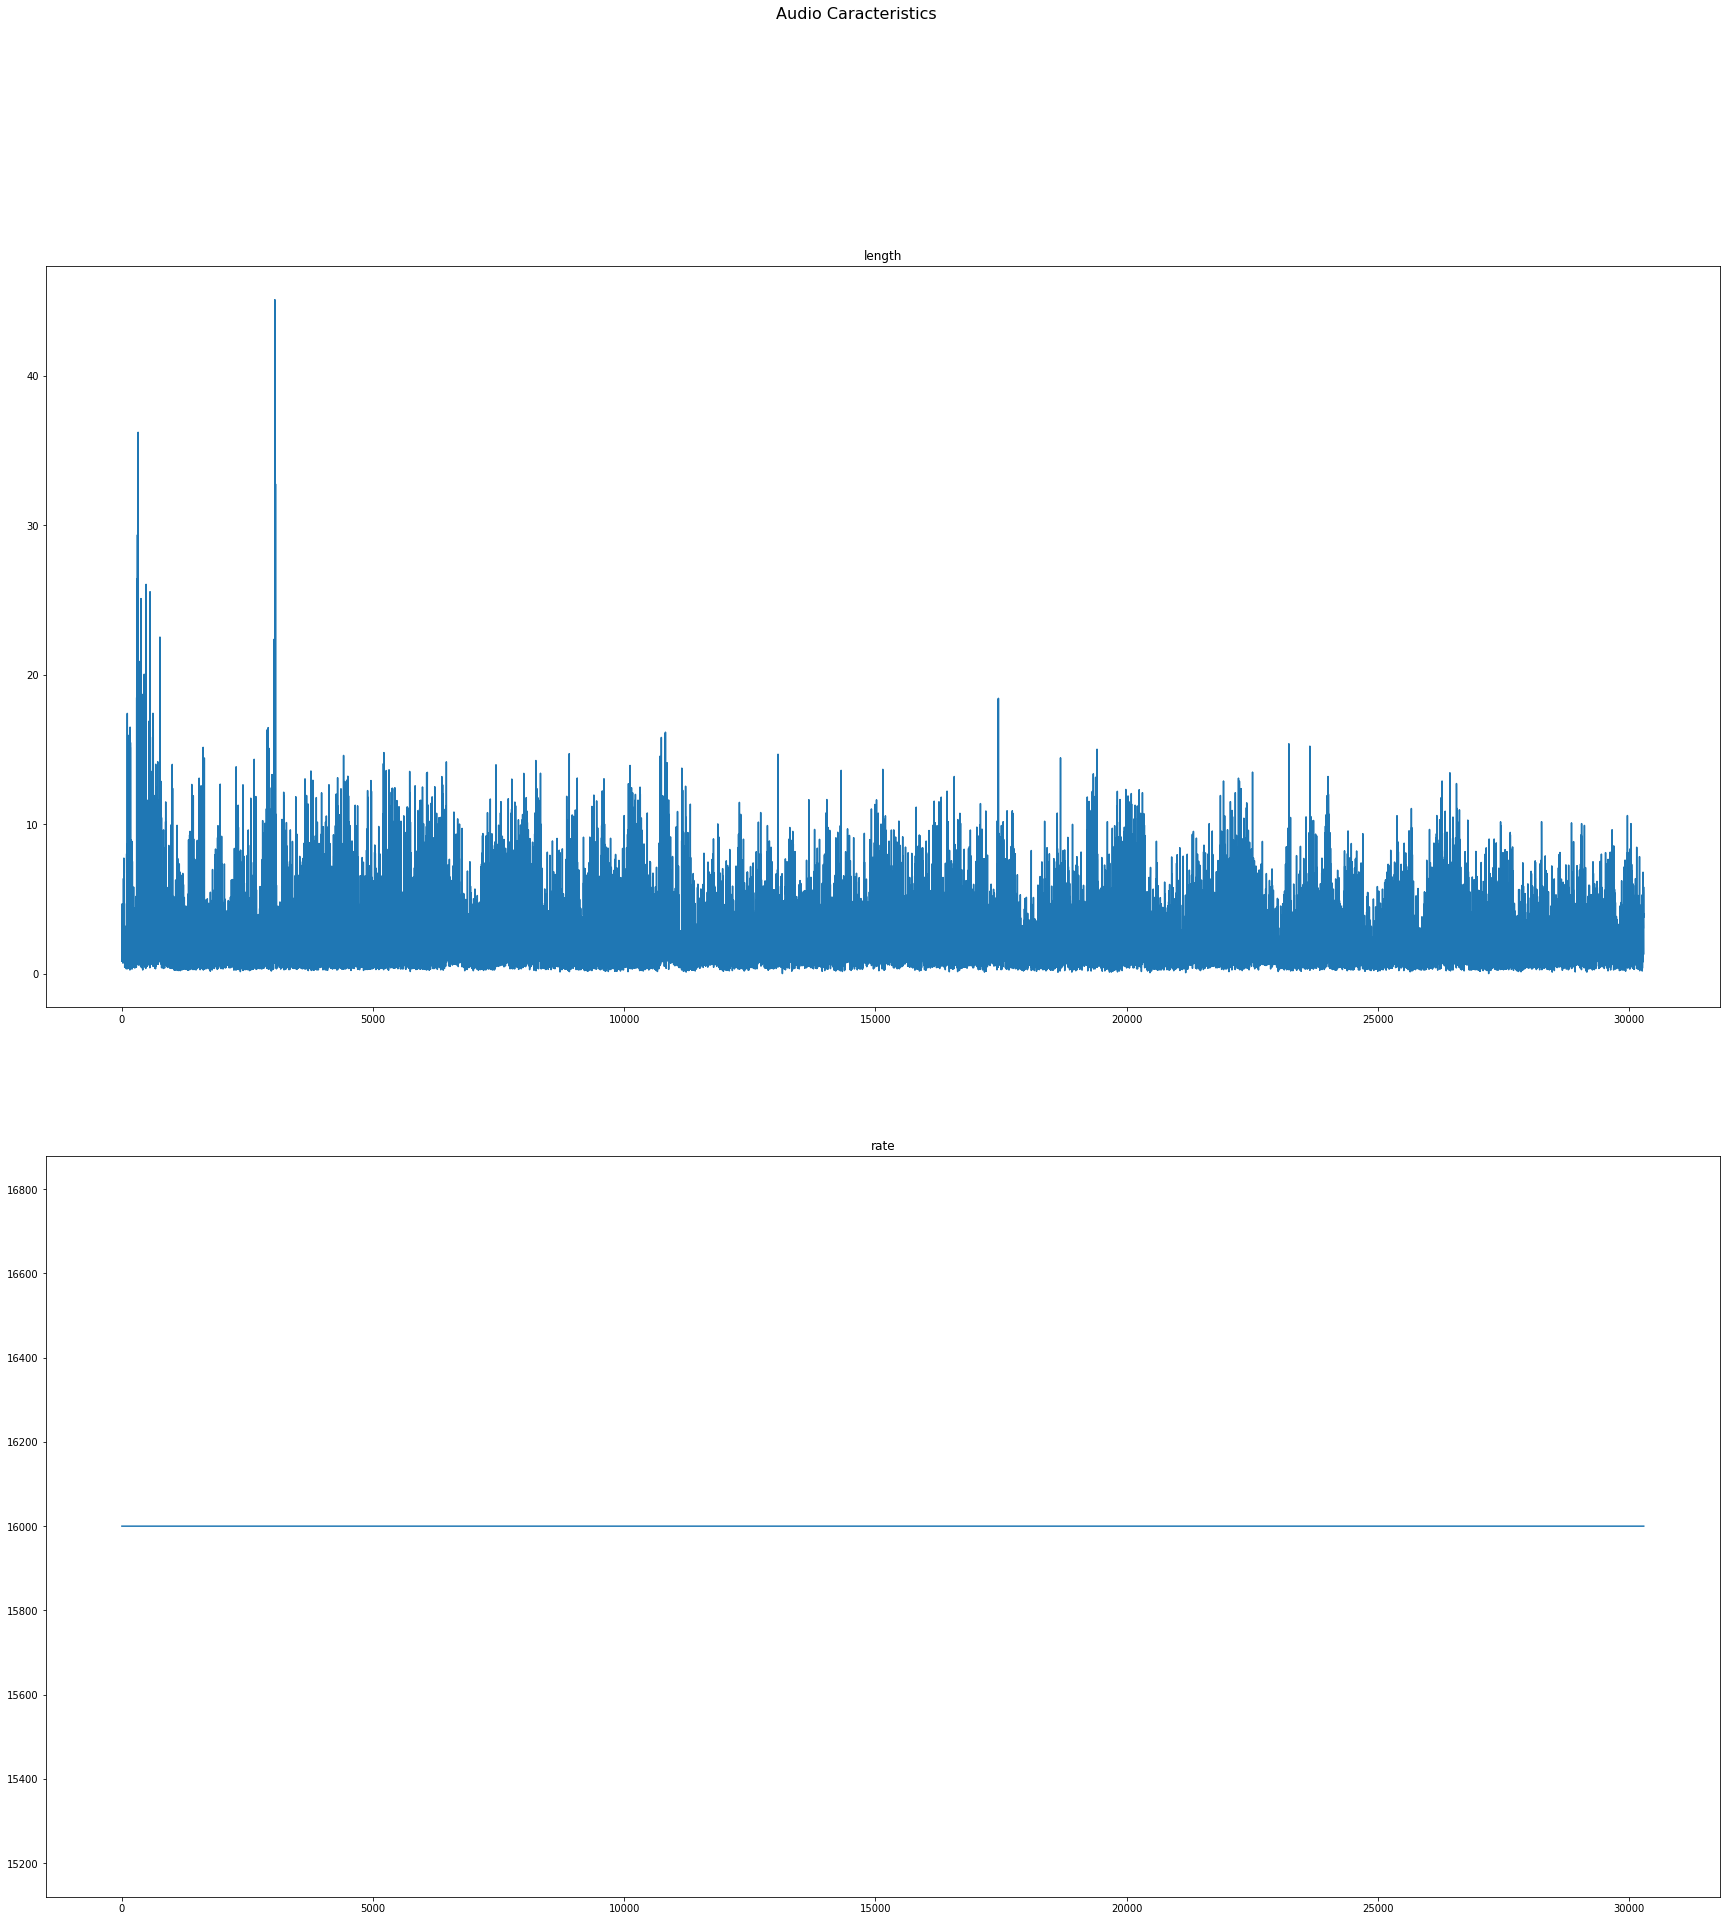

In [123]:
fig, ax = plt.subplots(2,1,figsize=(30,30))
fig.suptitle("Audio Caracteristics", x=0.5, y=1, fontsize=16)
#plot
ax[0].plot(caract[:,0])
ax[0].set_title("length")
#plot rate
ax[1].plot(caract[:,1])
ax[1].set_title("rate")


caract = np.array(caract, dtype=np.float32)
print(caract.shape)


In [112]:
print(caract[:,0])

[662.13153 662.13153 662.13153 ... 662.13153 662.13153 662.13153]


In [114]:
data=pd.DataFrame(caract)


In [115]:
data.describe()

,0,1
count,30298.000000,30298.0
mean,662.131470,22050.0
std,0.000000,0.0
min,662.131531,22050.0
25%,662.131531,22050.0
50%,662.131531,22050.0
75%,662.131531,22050.0
max,662.131531,22050.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000242B3954EB8>,
      dtype=object)

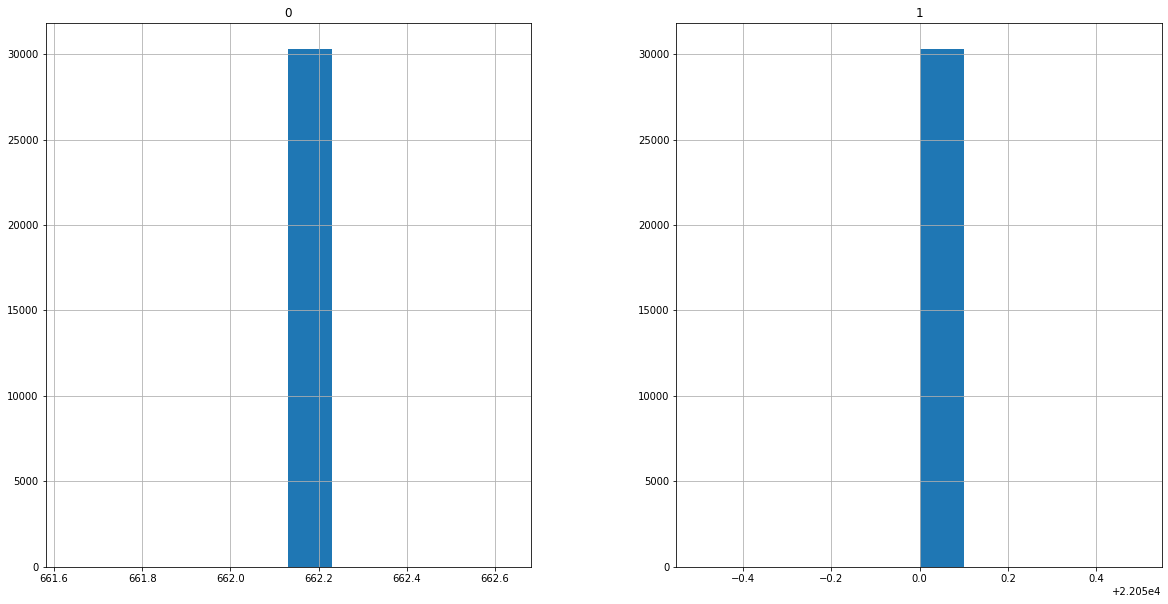

In [116]:
data.hist(figsize=(20,10))